In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/customer_churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

#more than half of the data type are object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df=df.drop(columns='customerID',axis=1)
#not required for model creation

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['TotalCharges'].unique()[:100]
#there are some special characters in here or empty space, due to this datatype was given as object

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8',
       '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25',
       '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3',
       '1530.6', '4749.15', '30.2', '6369.45', '1093.1', '6766.95',
       '181.65', '1874.45', '20.2', '45.25', '7251.7', '316.9', '3548.3',
       '3549.25', '1105.4', '475.7', '4872.35', '418.25', '4861.45',
       '981.45', '3906.7', '97', '144.15', '4217.8', '4254.1', '3838.75',
       '1426.4', '1752.65', '633.3', '4456.35', '1752.55', '6311.2',
       '7076.35', '894.3', '7853.7', '4707.1', '5450.7', '2962', '957.1',
       '857.25', '244.1', '3650.35', '2497.2', '930.9', '887.35', '49.05',
       '1090.65', '7099', '1424.6', '177.4', '6139.5', '2688.85',
       '482.25', '2111.3', '1216.6', '79.35', '565.35', '496.9', '4327.5',
       '973.35', '918.75', '2215.45', '1057', '927.1', '1009.25',
       '257

In [ ]:
df['TotalCharges'].nunique()

6531

**errors='coerce'**

when we use it, any non numerical values will be replaced with NaN

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

#converting datatype to numeric form

In [ ]:
df['TotalCharges'].unique()[:100]
#checking after conversion

array([  29.85, 1889.5 ,  108.15, 1840.75,  151.65,  820.5 , 1949.4 ,
        301.9 , 3046.05, 3487.95,  587.45,  326.8 , 5681.1 , 5036.3 ,
       2686.05, 7895.15, 1022.95, 7382.25,  528.35, 1862.9 ,   39.65,
        202.25,   20.15, 3505.1 , 2970.3 , 1530.6 , 4749.15,   30.2 ,
       6369.45, 1093.1 , 6766.95,  181.65, 1874.45,   20.2 ,   45.25,
       7251.7 ,  316.9 , 3548.3 , 3549.25, 1105.4 ,  475.7 , 4872.35,
        418.25, 4861.45,  981.45, 3906.7 ,   97.  ,  144.15, 4217.8 ,
       4254.1 , 3838.75, 1426.4 , 1752.65,  633.3 , 4456.35, 1752.55,
       6311.2 , 7076.35,  894.3 , 7853.7 , 4707.1 , 5450.7 , 2962.  ,
        957.1 ,  857.25,  244.1 , 3650.35, 2497.2 ,  930.9 ,  887.35,
         49.05, 1090.65, 7099.  , 1424.6 ,  177.4 , 6139.5 , 2688.85,
        482.25, 2111.3 , 1216.6 ,   79.35,  565.35,  496.9 , 4327.5 ,
        973.35,  918.75, 2215.45, 1057.  ,  927.1 , 1009.25, 2570.2 ,
         74.7 , 5714.25, 7107.  , 7459.05,  927.35, 4748.7 ,  113.85,
       1107.2 , 2514

In [ ]:
df.info()
#datatype of totalcharges-changed to float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Example for pd.to_numeric

In [ ]:
data=pd.DataFrame([1,2,3,4,'Hello',5,6,7],columns=['Number'])

In [ ]:
data

,Number
0,1
1,2
2,3
3,4
4,Hello
5,5
6,6
7,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  8 non-null      object
dtypes: object(1)
memory usage: 192.0+ bytes


In [ ]:
data['Number']=pd.to_numeric(data['Number'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  7 non-null      float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [ ]:
data

,Number
0,1.0
1,2.0
2,3.0
3,4.0
4,NaN
5,5.0
6,6.0
7,7.0


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

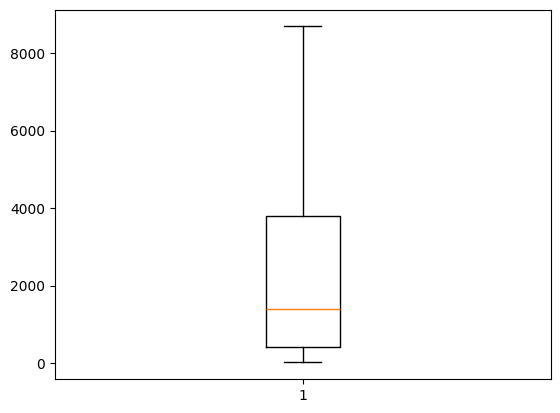

In [ ]:
plt.boxplot(df['TotalCharges'])
plt.show()

In [ ]:
df['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
#decision tree, random forest- usually tolerate outliers, so its not a mandatory step to remove oultiers

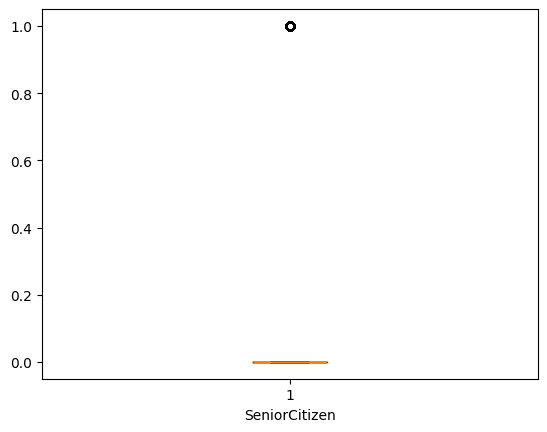

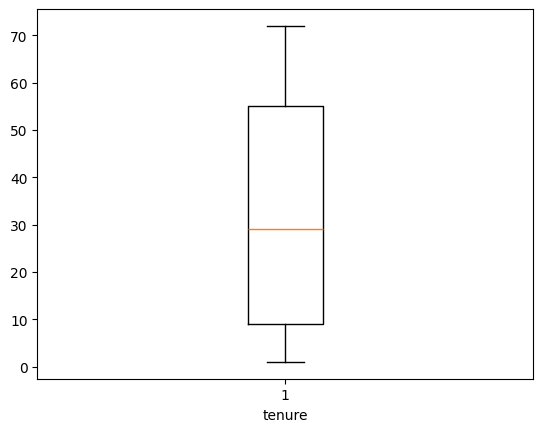

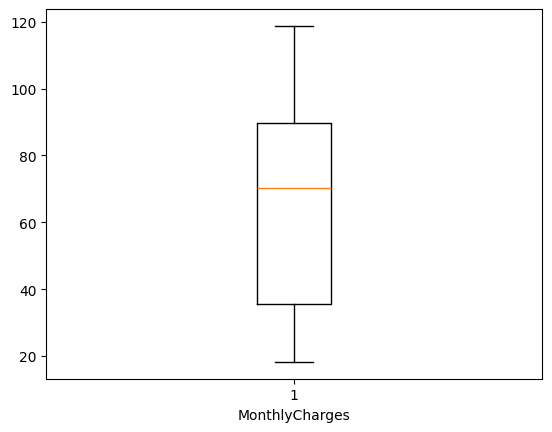

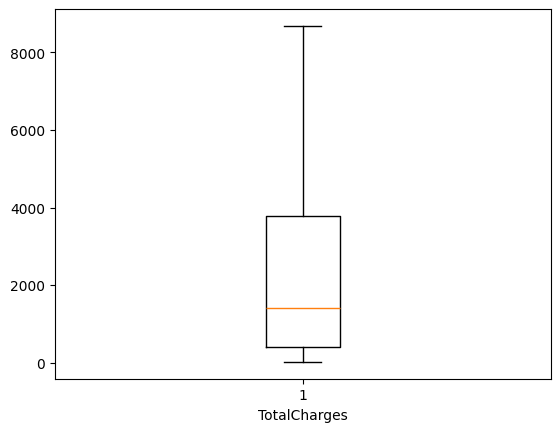

In [ ]:
for col in df.columns:
  if df[col].dtype!='object' and col!='Churn':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])
    print(le.classes_)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   int64  
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   int64  
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   int64  
 17  

**Model Building**

In [ ]:
X=df.iloc[:,:-1]
y=df['Churn']

In [ ]:
X.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=50,random_state=23)

#n_estimator- no of trees in the forest, as the number of trees increases, the accuracy of the model increases
#default value of n_estimator=100
#you have to do cross validation to find the optimal n_estimator value

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=23)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7860696517412935

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[967, 114],
       [153, 168]])

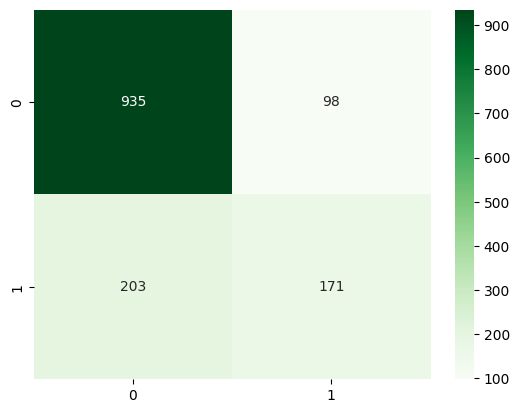

In [ ]:
sns.heatmap(cm,cmap='Greens',annot=True,fmt='d');

**n_estimators** - The number of trees in the random forest.

**max_depth** - Maximum depth of the tree.[if max_depth is high, then overfitting may happen, but it may be able to capture more complex patterns]


**min_samples_split** - The minimum number of samples required to split an internal node.

**min_samples_leaf** - The number of samples required to be at a leaf node.

**criterion** - The function to measure the quality of a split.

**GridSearchCV**

There is another method named randomsearchCV for hyperparameter tuning.

Its better to use GridSearchCV

In [ ]:
param={
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

#above are few of the universally accepted tested values.Usually one among these will give the best parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier=RandomForestClassifier(random_state=23)

In [ ]:
grid_search=GridSearchCV(estimator=classifier,param_grid=param,cv=2)

#cv-denotes number of cross validation folds

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
new_model=RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 300,random_state=23)

In [ ]:
new_model.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=23)

In [ ]:
new_pred=new_model.predict(x_test)

In [ ]:
accuracy_score(y_test,new_pred)

0.8131241084165478